In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications import MobileNet
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Using TensorFlow backend.
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yotam hermon\Anacond

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [4]:
def validation(model, train_datagen):
    #model=Model(inputs=base_model.input,outputs=preds)
    #model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    val_generator=train_datagen.flow_from_directory('../data/validation/', # this is where you specify the path to the main data folder
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='categorical',                                                 
                                                     shuffle=True)

    step_size_val=val_generator.n//val_generator.batch_size
    history1 = model.fit_generator(generator=val_generator,
                       steps_per_epoch=step_size_val,
                       epochs=5)
    return history1

In [5]:
input_shape = (224, 224, 3)
#base_model=ResNet50(weights='imagenet',include_top=False) #imports the ResNet50V2 model and discards the last 1000 neuron layer.
base_model_rn = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

x=base_model_rn.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [6]:
model_rn=Model(inputs=base_model_rn.input,outputs=preds)

In [7]:
for layer in model_rn.layers[:20]:
    layer.trainable=False
for layer in model_rn.layers[20:]:
    layer.trainable=True

In [8]:
train_datagen_rn=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_rn=train_datagen_rn.flow_from_directory('../Data_for_TIMIT/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=16,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 18000 images belonging to 6 classes.


In [9]:
model_rn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_rn=train_generator_rn.n//train_generator_rn.batch_size
history_rn = model_rn.fit_generator(generator=train_generator_rn,
                   steps_per_epoch=step_size_train_rn,
                   epochs=5)


Epoch 1/5
1125/1125 [==============================] - 254s 226ms/step - loss: 0.5263 - accuracy: 0.8050
Epoch 2/5
1125/1125 [==============================] - 250s 222ms/step - loss: 0.3359 - accuracy: 0.8775
Epoch 3/5
1125/1125 [==============================] - 250s 222ms/step - loss: 0.2884 - accuracy: 0.8929
Epoch 4/5
1125/1125 [==============================] - 250s 222ms/step - loss: 0.2626 - accuracy: 0.9017
Epoch 5/5
1125/1125 [==============================] - 250s 222ms/step - loss: 0.2416 - accuracy: 0.9082


In [10]:
x=base_model_rn.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax',activity_regularizer=regularizers.l2(1e-5))(x) #final layer with softmax activation

model_rn_tiktalk=Model(inputs=model_rn.input,outputs=preds)

for layer in model_rn.layers[:20]:
    layer.trainable=False
for layer in model_rn.layers[20:]:
    layer.trainable=True
    
train_datagen_rn_tiktalk=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_rn_tiktalk=train_datagen_rn_tiktalk.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                                         target_size=(224,224),
                                                                         color_mode='rgb',
                                                                         batch_size=16,
                                                                         class_mode='categorical',                                                 
                                                                         shuffle=True)

Found 2970 images belonging to 2 classes.


In [11]:
model_rn_tiktalk.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_rn_tiktalk=train_generator_rn_tiktalk.n//train_generator_rn_tiktalk.batch_size
history_rn_tiktalk = model_rn_tiktalk.fit_generator(generator=train_generator_rn_tiktalk,
                                                       steps_per_epoch=step_size_train_rn_tiktalk,
                                                       epochs=5)

Epoch 1/5
185/185 [==============================] - 45s 245ms/step - loss: 0.4672 - accuracy: 0.8395
Epoch 2/5
185/185 [==============================] - 41s 222ms/step - loss: 0.4048 - accuracy: 0.8362
Epoch 3/5
185/185 [==============================] - 41s 222ms/step - loss: 0.3794 - accuracy: 0.8460
Epoch 4/5
185/185 [==============================] - 41s 222ms/step - loss: 0.3440 - accuracy: 0.8592
Epoch 5/5
185/185 [==============================] - 41s 222ms/step - loss: 0.3274 - accuracy: 0.8605


In [12]:
history1_rn_tiktalk = validation(model_rn_tiktalk,train_datagen_rn_tiktalk)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 2s 293ms/step - loss: 0.9333 - accuracy: 0.4808
Epoch 2/5
7/7 [==============================] - 1s 201ms/step - loss: 0.6557 - accuracy: 0.6058
Epoch 3/5
7/7 [==============================] - 1s 202ms/step - loss: 0.5882 - accuracy: 0.7596
Epoch 4/5
7/7 [==============================] - 1s 212ms/step - loss: 0.4481 - accuracy: 0.8125
Epoch 5/5
7/7 [==============================] - 1s 190ms/step - loss: 0.3365 - accuracy: 0.8438


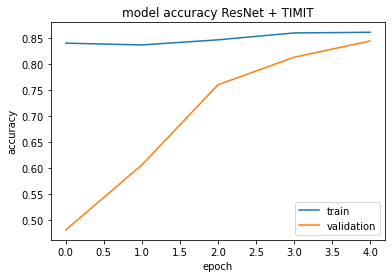

In [13]:
plt.plot(history_rn_tiktalk.history['accuracy'])
plt.plot(history1_rn_tiktalk.history['accuracy'])
plt.title('model accuracy ResNet + TIMIT')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

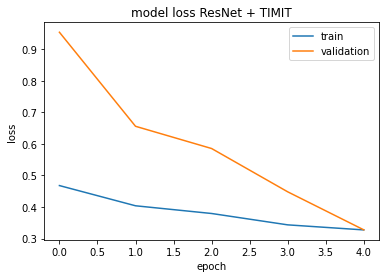

In [14]:
plt.plot(history_rn_tiktalk.history['loss'])
plt.plot(history1_rn_tiktalk.history['loss'])
plt.title('model loss ResNet + TIMIT')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()